In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from Fitter import Fitter
from Fitter import Functions
import numpy as np
import matplotlib.pyplot as plt
import random, scipy

In [2]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# Use the fit function of fit to, well, fit a given x,y data
# Let's destinguish two type of function. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).
# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters if used to innitilized the fit

# For Complex functions fit(x,y, int) are fit(x,y,list) are valid inputs. 
# If the option with a int is used then the algorithm will use this value to generate the fitting function
# For example, fit(xx,yy,3) will fit a sum of two gaussian(2d) or a 3-degree polinom.   
# If fit(x,y,list) is used then the number of componenets (n gaussians, n-degree function) is inferred.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))

vars: [-1.0, 0.0], m: -1.0, b: 0.0
[-1.0, 0.0]
-1.0
0.0
[-20.]


/home/guilherme/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.573e+06 (chi2/ndof = 397.1)│              Nfcn = 44               │
│ EDM = 1.05e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬────

<IPython.core.display.Javascript object>


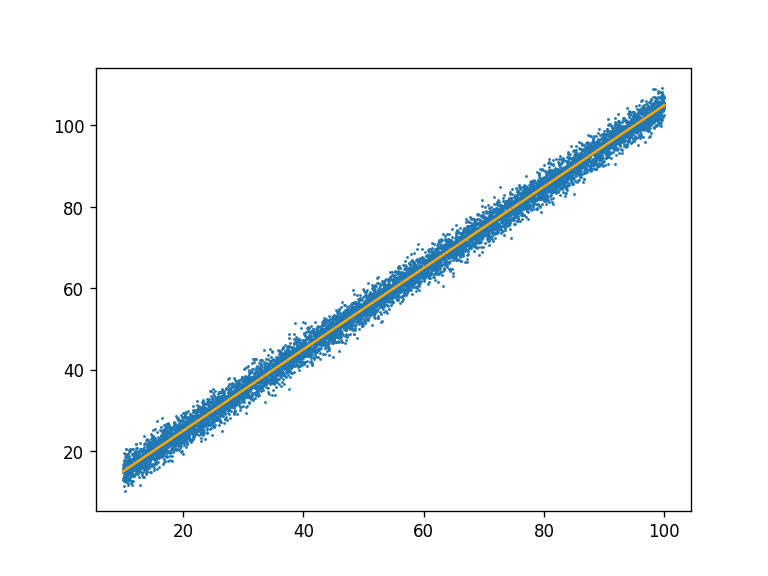

In [7]:
f = Fitter("linear")

m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

plt.plot(xx, xx*p.m+p.b, c="orange")

<IPython.core.display.Javascript object>


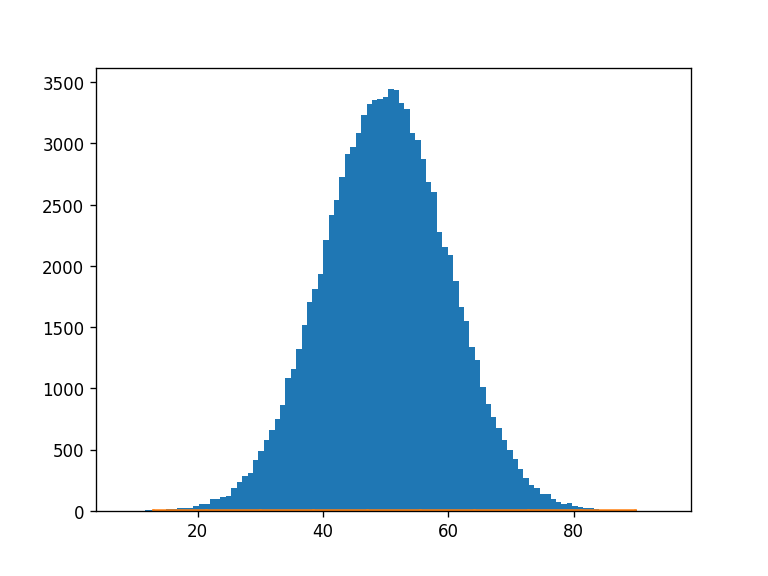

x,amp,mean,sigma
-------------
[10 10 10 10 10 10 10 10 10 10] [ 8.54133797 17.08621269 25.63108742 34.17596214 42.72083687 51.26571159
 59.81058632 68.35546104 76.90033577 85.44521049 93.99008522]
Estimating p0 : [10, 51.26571159161112, 24.543284083164398]
fitter
[12.81377533 21.35865005 29.90352478 38.4483995  46.99327423 55.53814895
 64.08302368 72.6278984  81.17277313 89.71764786] [10 10 10 10 10 10 10 10 10 10] [2.4791196 2.4791196 2.4791196 2.4791196 2.4791196 2.4791196 2.4791196
 2.4791196 2.4791196 2.4791196]
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0003324 (chi2/ndof = 0.0)│              Nfcn = 199              │
│ EDM = 0.000136 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Mini

In [49]:
f = Fitter("gaussian")

mu, sig = 50,10
yy = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yy, bins=100)
#plt.scatter(range(len(yy)), yy,s=0.1)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
print(f)

p0=[10,30,10]
f.fit(xx,yy)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr)
#or f.fit(xx,yy,p0=p0)
p = f.getParams()
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)
#plt.plot(xx,f.evaluate(xx), c="orange")

#plt.plot(xx,f.func(xx, p.amp, p.mean+10, p.sigma), c="red")

<IPython.core.display.Javascript object>


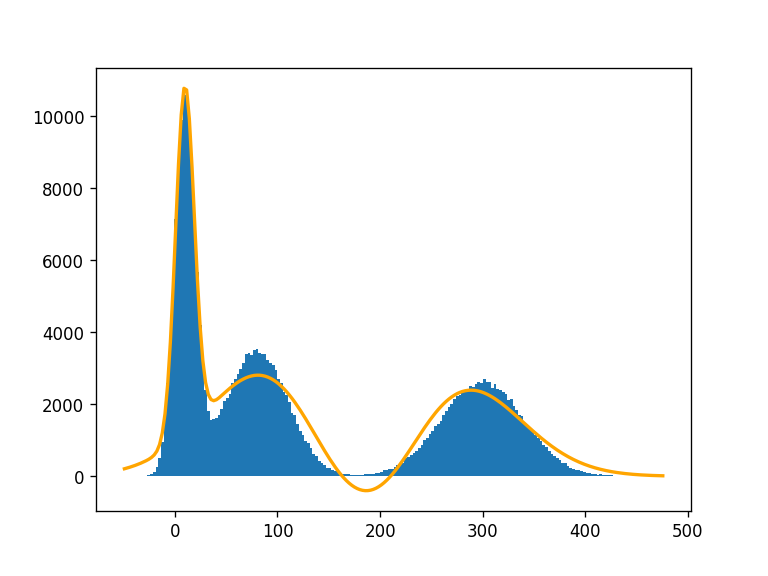

Estimating p0 : [10654.0, 36.517508023036136, 50.22814513051405, 2611.0, 210.5328820580043, 50.228145130514044, 2701.0, 384.54825609297245, 50.22814513051405]
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.424e+10 (chi2/ndof = 126900072.8)│             Nfcn = 1593              │
│ EDM = 4.44e+08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED  

In [9]:
f = Fitter("gaussian")

mu, sig = 20,10
m2 = np.array(np.random.normal(10, 10, size = 100000))
m1 = np.array(np.random.normal(80, 30, size = 100000))
m3 = np.array(np.random.normal(300, 40, size = 100000))

yy = np.concatenate((m2, m1,m3))
fig = plt.figure()

res = plt.hist(yy, bins=200)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f.fit(xx,yy,3)
p = f.getParams()
print(f.par)
print(p)

plt.plot(xx,f.evaluate(xx), c="orange", lw=2)

<IPython.core.display.Javascript object>


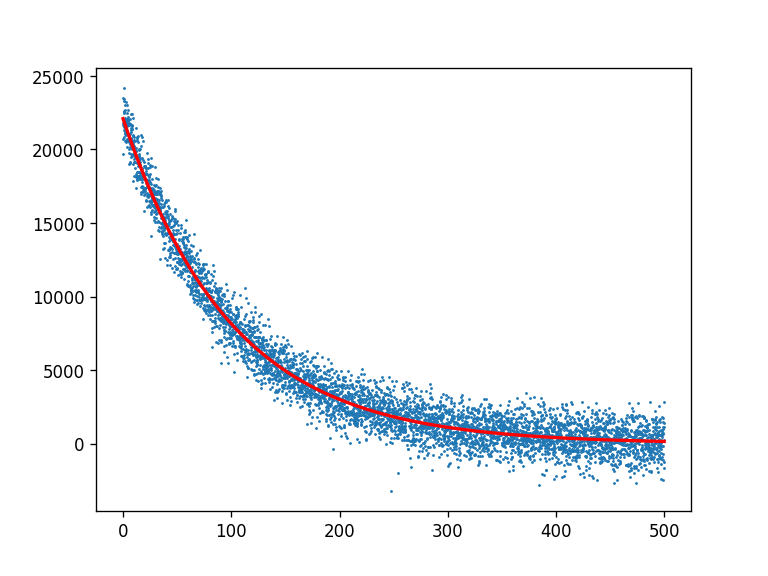

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.042e+11 (chi2/ndof = 100871112.6)│              Nfcn = 75               │
│ EDM = 0.000864 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬────────

In [10]:
f = Fitter("expo")
fig = plt.figure()

p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

/tmp/ipykernel_415/2348173969.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6746 (chi2/ndof = 0.0)     │              Nfcn = 675              │
│ EDM = 3.17e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

<IPython.core.display.Javascript object>


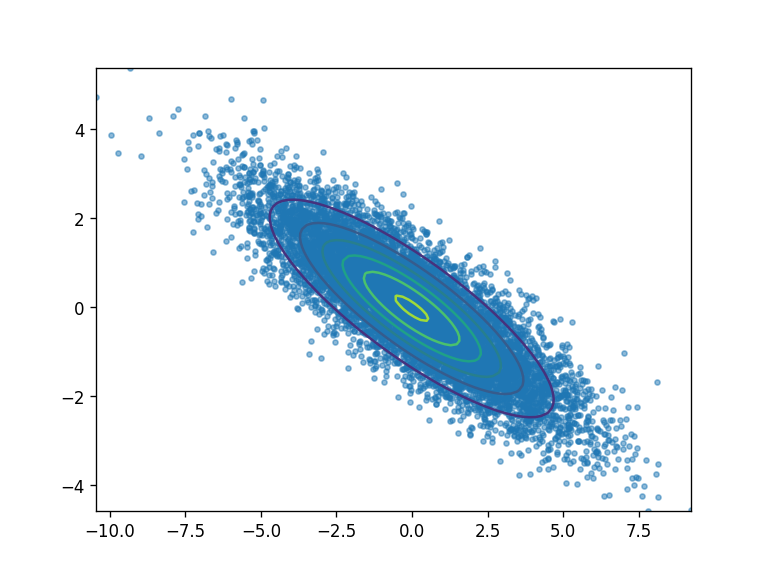

In [11]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 313.2 (chi2/ndof = 0.0)    │             Nfcn = 1756              │
│ EDM = 7.6e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

<IPython.core.display.Javascript object>


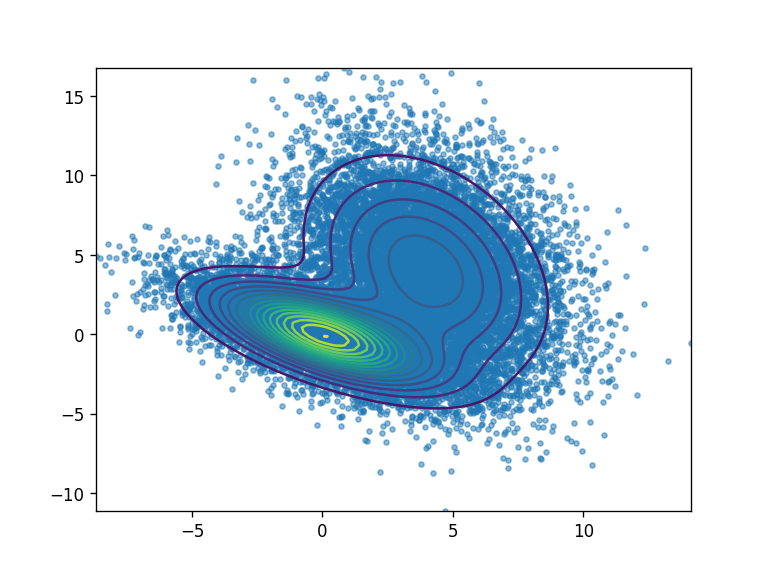

In [12]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,2)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

[-2.65947648e-02 -8.40667003e-03  2.83902290e+00  1.21972788e+00
  1.53611634e-02  5.86708320e-01  1.94109367e+00  4.96536728e+00
  2.84305034e+00  1.22092169e+00  1.52223066e-02  5.84109111e-01
  1.48906487e+01  4.99666366e+00  2.78439681e+00  1.21818670e+00
  1.55672076e-02  5.77766342e-01]
vars: [-0.026594764765577417, -0.008406670028301748, 2.839022895552128, 1.2197278818676518, 0.015361163381473596, 0.5867083201532621, 1.9410936741087097, 4.965367278771944, 2.8430503426300735, 1.2209216887979837, 0.015222306590031804, 0.5841091114278497, 14.890648699285867, 4.99666365607564, 2.7843968146547184, 1.218186700004196, 0.015567207573111084, 0.5777663417674038], x0_0: -0.026594764765577417, y0_0: -0.008406670028301748, sigma_x_0: 2.839022895552128, sigma_y_0: 1.2197278818676518, amp_0: 0.015361163381473596, theta_0: 0.5867083201532621, x0_1: 1.9410936741087097, y0_1: 4.965367278771944, sigma_x_1: 2.8430503426300735, sigma_y_1: 1.2209216887979837, amp_1: 0.015222306590031804, theta_1: 0.5

<IPython.core.display.Javascript object>


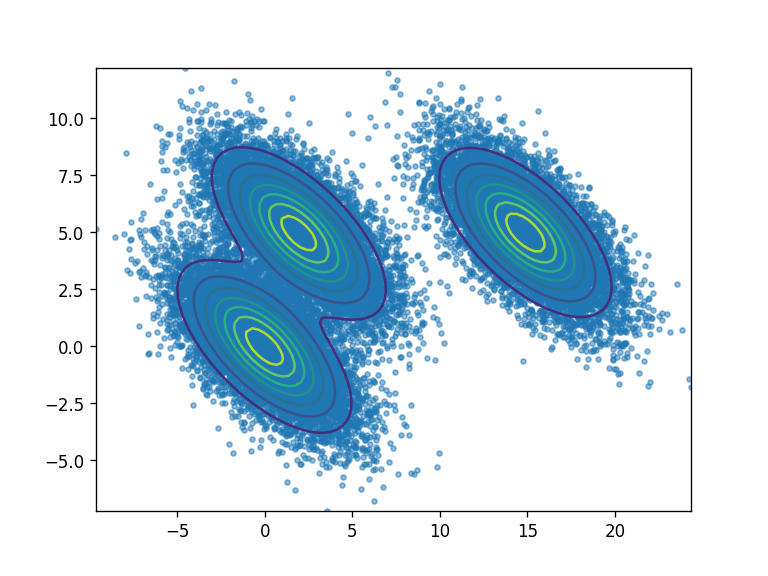

In [14]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

(5000,)
p0  3
1666
Estimate p0,  [621.194716396392, 845.5872260300348, 1092.1426377834025]
[ 10.0043099    0.48818602 -18.06284007]
vars: [10.004309896933917, 0.48818602375462294, -18.062840066880717], a: 10.004309896933917, b: 0.48818602375462294, c: -18.062840066880717
10.004309896933917


<IPython.core.display.Javascript object>


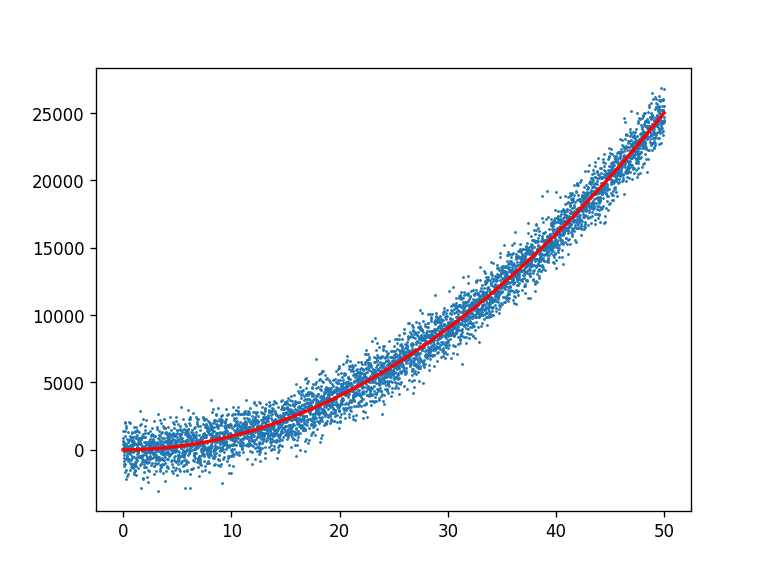

In [15]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

(10000,)
p0  4
2500
Estimate p0,  [-19393.719384286385, -20323.70373801024, -22332.985899404557, -21634.266845119062]
[ -1.99068027   1.31401356 -30.78581369 207.72844306]
vars: [-1.990680271672905, 1.314013558099457, -30.78581369246404, 207.72844305898485], a: -1.990680271672905, b: 1.314013558099457, c: -30.78581369246404, d: 207.72844305898485
-1.990680271672905


<IPython.core.display.Javascript object>


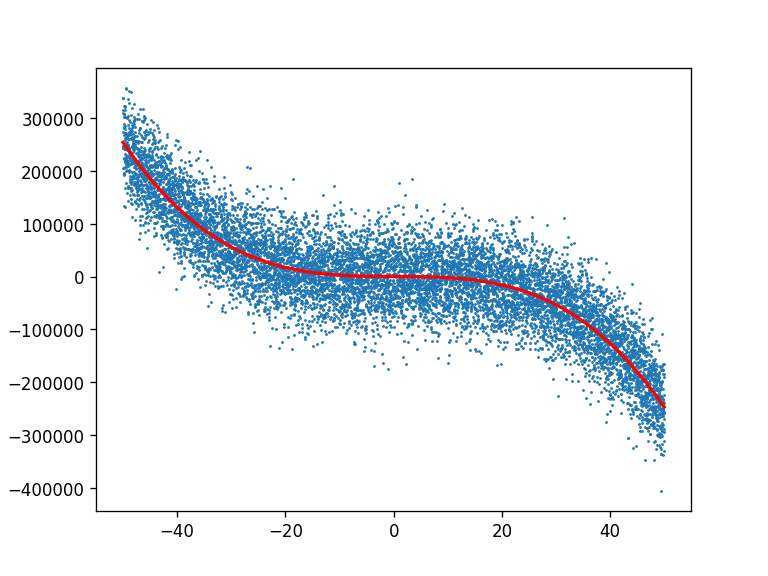

In [16]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)